In [3]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# permitir visualizar todas as colunas
pd.options.display.max_columns = None

# renderizar os gráficos diretamento no notebook
# %matplotlib inline

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Q1. Quantas variáveis (colunas) e quantas entradas (linhas) possui o arquivo?

In [7]:
# verificando as dimensões do DataFrame
print("Variáveis:\t{}\nEntradas:\t{}".format(train.shape[1], train.shape[0]))


Variáveis:	12
Entradas:	891


3. Exploração dos Dados<br/>
Em uma análise inicial, serão estudadas cada variável. É importante verificar seu nome, tipo, porcentagem de valores faltantes, presença de outliers e tipo de distribuição.<br/>

Como se trata de um Aprendizado Supervisionado (Supervised Learning), a variável Survived é definida como sendo a nossa variável alvo (target).<br/>

Dicionário de Dados<br/>
PassengerId: Número de identificação do passageiro<br/>
Survived: Informa se o passageiro sobreviveu ao desastre<br/>

0 = Não<br/>
1 = Sim<br/>
Pclass: Classe do bilhete<br/>
1 = 1ª Classe<br/>
2 = 2ª Classe<br/>
3 = 3ª Classe<br/>
Name: Nome do passageiro<br/>
Sex: Sexo do passageiro<br/>
Age: Idade do passageiro<br/>
SibSp: Quantidade de cônjuges e irmãos a bordo<br/>
Parch: Quantidade de pais e filhos a bordo<br/>
Ticket: Número da passagem<br/>
Fare: Preço da Passagem<br/>
Cabin: Número da cabine do passageiro<br/>
Embarked: Porto no qual o passageiro embarcou<br/>
C = Cherbourg<br/>
Q = Queenstown<br/>
S = Southampton<br/>
Q1. Quais os tipos de cada variável?<br/>

Variáveis Numéricas<br/>
Discretas<br/>
Pclass<br/>
SibSp<br/>
Parch<br/>
Contínuas<br/>
Age<br/>
Fare<br/>
Alvo<br/>
Survived<br/>
Chave Primária<br/>
PassengerId<br/>
Variáveis Categóricas<br/>
Name<br/>
Sex<br/>
Ticket<br/>
Cabin<br/>
Embarked<br/>


In [42]:
# identificar o tipo de cada variável
display(train.dtypes)

# ver as 5 primeiras entradas do conjunto de treino
display(train.head())


Pclass            int64
Sex               int64
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Embarked_914      uint8
Embarked_C        uint8
Embarked_Q        uint8
Embarked_S        uint8
dtype: object

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_914,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,0,1


Q2. Qual a porcentagem de valores faltantes?

A informação sobre a Cabin é a que possui o maior número de informações faltantes, com mais de 77%. Após, a coluna Age não possui valor em quase 20% dos passageiros. Por fim, a coluna informando o Porto de embarque (Embarked) possui apenas 2% de informações faltantes.

In [9]:
# ver a porcentagem valores faltantes
(train.isnull().sum() / train.shape[0]).sort_values(ascending=False)


Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

Q3. Como é a distribuição estatística dos dados?

In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


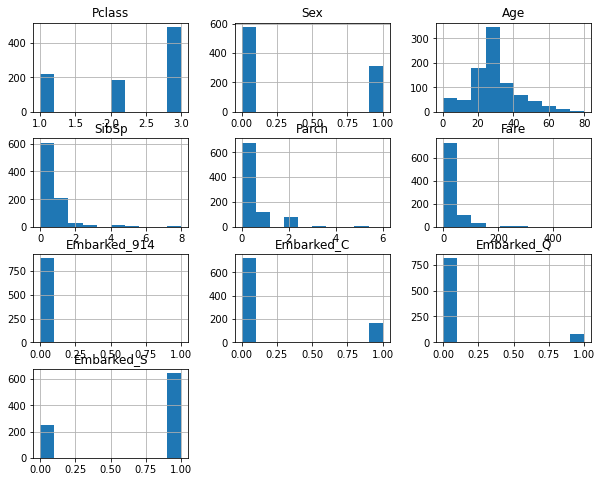

In [45]:
# ver histograma das variáveis numéricas
train.hist(figsize=(10,8));

Q4. Quais grupos de pessoas tinham mais chances de sobrevivência??



In [12]:
# Analisar a probabilidade de sobrevivência pelo Sexo
train[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


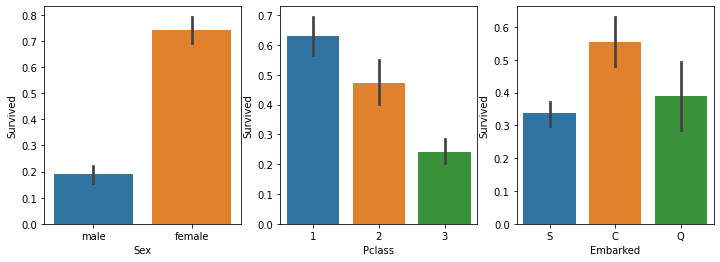

In [13]:
# Plotar os gráficos para Survived vs. Sex, Pclass e Embarked
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,4))

sns.barplot(x='Sex', y='Survived', data=train, ax=axis1)
sns.barplot(x='Pclass', y='Survived', data=train, ax=axis2)
sns.barplot(x='Embarked', y='Survived', data=train, ax=axis3);

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


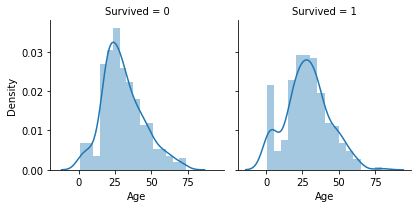

In [14]:
# ver influência da idade na probabilidade de sobrevivência
age_survived = sns.FacetGrid(train, col='Survived')
age_survived.map(sns.distplot, 'Age')

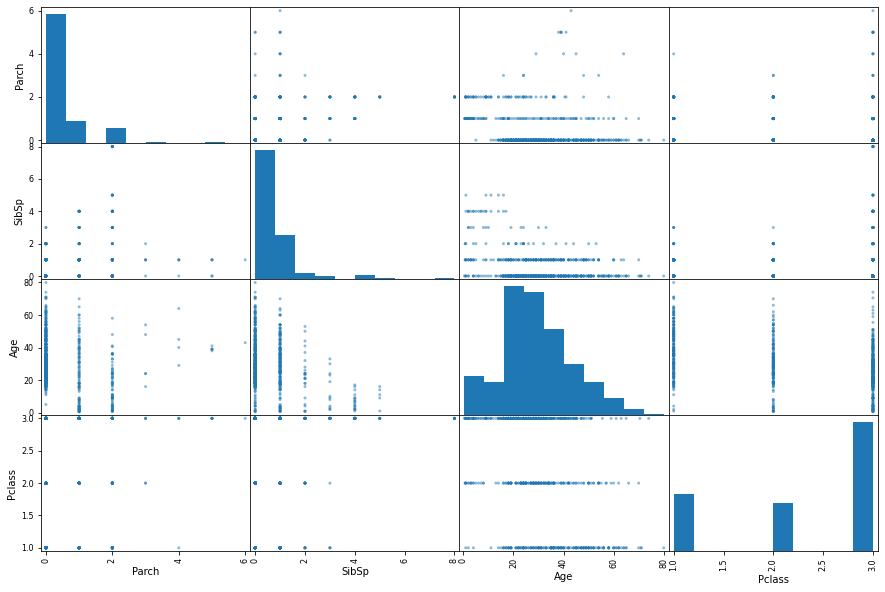

In [15]:
# plotar uma scatter matrix
columns=['Parch', 'SibSp', 'Age', 'Pclass']
pd.plotting.scatter_matrix(train[columns], figsize=(15, 10));

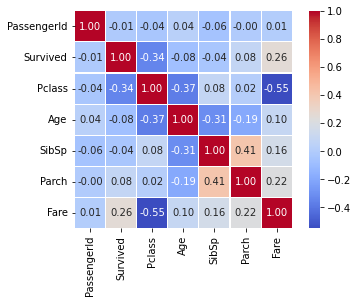

In [16]:
# plotar o heatmap para as variáveis numéricas
sns.heatmap(train.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=True);

Pouca gente sabe que o método df.describe() pode ser usado também para ver algo sobre a estatística descritiva em colunas que não são números. Para isso, é só passar o argumento include=['O'].

ATENÇÃO, é a letra 'O', e não o número 0!

In [17]:

train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Olhando esses dados a gente observa que:

Os valores para Name são únicos, um para cada pessoa;
Não há missing values para Name e Sex;
Existem apenas os sexos Masculino e Feminino, sendo que o com maior frequência é o Masculino (577/891 = 65%);
O Porto no qual embarcaram mais passageiros é o de S = Southampton.
4 Preparação dos Dados
Até o presente momento, tudo o que fizemos foi importar os dados para estruturas DataFrame, formular hipóteses, iniciar uma análise exploratória dos dados e visualizar graficos e correlações entre aquelas variáveis que julgamos pertinente.

Um projeto de data science não é amarrado e rigoroso, onde a gente segue um passo-a-passo linear, mas sim um processo iterativo, onde a gente vai e volta sempre que for necessário.

Quando a gente pega o notebook de alguém, fica sempre a impressão que está bem estruturado e que foi "direto ao ponto*. No entanto, antes de trazer uma versão bonitinha, eu vou e volto ao começo inúmeras vezes!

Lembre-se disso: uma versão final é uma versão que foi reescrita várias vezes. Vá e volte ao começo sempre que precisar para adicionar informações novas que fizeram sentido :)

Juntando os datasets de treino e teste
Uma dica para quando você vai preparar os dados para um modelo de Machine Learning é juntar os datasets de treino e teste em um único, e separar novamente no final.

Muitas vezes a gente vai fazer um feature engineering, criar variáveis dummy ou codificar as variáveis. Daí, nosso modelo vai ser treinado em cima dessa arquitetura, e os dados de teste vão ter que seguir essa mesma estrutura.

Por isso, é muito mais fácil fazer todas as etapas para um único DataFrame e dividir novamente entre treino e teste.

In [18]:
# salvar os índices dos datasets para recuperação posterior
train_idx = train.shape[0]
test_idx = test.shape[0]

# salvar PassengerId para submissao ao Kaggle
passengerId = test['PassengerId']

# extrair coluna 'Survived' e excluir ela do dataset treino
target = train.Survived.copy()
train.drop(['Survived'], axis=1, inplace=True)

# concatenar treino e teste em um único DataFrame
df_merged = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

print("df_merged.shape: ({} x {})".format(df_merged.shape[0], df_merged.shape[1]))


df_merged.shape: (1309 x 11)


Selecionar as features
Como qualquer conjunto de dados do mundo real, você vai se deparar sempre com dados que não servem para nada e outros que não tem peso ou significância nenhuma no seu modelo.

Muitas vezes nosso julgamento pode ser equivocado, mas infelizmente é papel seu, como cientista de dados, escolher quais features serão usadas para o modelo de Machine Learning.

No nosso caso, vamos desconsiderar as variáveis ['PassengerId', 'Name', 'Ticket', 'Cabin'], pois aparentemente não parecem relevantes.

In [19]:
df_merged.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

Assim, ficamos com as seguintes variáveis a serem tratadas e preparadas: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'].

Valores faltante
Vamos dar uma olhada nos valores que faltam em cada columna e tratar esses campos vazios.

Normalmente, há duas abordagens mais utilizadas quando a gente encontra missing values:

Preencher esses valores arbitrariamente (média, mediana, valor mais frequente); e
Excluir a linha inteira.
Cada caso é um caso e novamente você, cientista de dados, é quem vai tomar a decisão sobre qual passo seguir.

Na maioria das vezes não é desejável jogar informação de uma linha inteira só por causa de um campo faltando. Sempre que possível é melhor você preencher o campo, e é isso que vamos fazer.

In [20]:
# completar ou apagar valores faltantes nos datasets de treino e teste
df_merged.isnull().sum()


Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

In [21]:
# age
age_median = df_merged['Age'].median()
df_merged['Age'].fillna(age_median, inplace=True)

# fare
fare_median = df_merged['Fare'].median()
df_merged['Fare'].fillna(fare_median, inplace=True)

# embarked
embarked_top = df_merged['Embarked'].value_counts()[0]
df_merged['Embarked'].fillna(embarked_top, inplace=True)


Preparar as variáveis pro modelo
O modelo matemático exige que trabalhemos com variáveis numéricas, ou seja, temos transformar os dados de entrada que estão em formato categoria para números.

Como você vê abaixo, eu convertir os valores possíveis de Sexpara {'male': 0, 'female': 1}. Já em relação à variável Embarked, apliquei o conceito de variáveis dummies.

As variáveis dummies (dummy variables) assumem aqui apenas valores 0 e 1, criando uma nova coluna para cada valor possível da variável categórica. Para ficar mais fácil entender, veja como fica o DataFrame após todos esses tratamentos:

In [22]:
# converter 'Sex' em 0 e 1
df_merged['Sex'] = df_merged['Sex'].map({'male': 0, 'female': 1})

# dummie variables para 'Embaked'
embarked_dummies = pd.get_dummies(df_merged['Embarked'], prefix='Embarked')
df_merged = pd.concat([df_merged, embarked_dummies], axis=1)
df_merged.drop('Embarked', axis=1, inplace=True)

display(df_merged.head())

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_914,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,0,1


Recuperando os datasets de treino e teste
Aqui a gente acabou de preparar o dataset para o modelo e vou dividir df_merged em train e test, exatamente como era no começo.

Agora você consegue entender a razão da concatenação lá em cima. Teríamos trabalho dobrado e ainda teria o risco de errarmos em alguma etapa.

In [23]:
# recuperar datasets de treino e teste
train = df_merged.iloc[:train_idx]
test = df_merged.iloc[train_idx:]

5 Construção do Modelo e Avaliação
Eu vivo falando no meu Instagram que a etapa mais demorada de qualquer projeto de Data Science é a Análise Exploratória de Dados e a preparação/tratamento deles.

Todo cuidado que tivemos serviu para entender o problema, testar hipóteses e descartar dados desnecessários/redundantes.

Com poucas linhas de código a gente consegue criar e otimizar modelos de Machine Learning básicos. Aqui, vamos construir dois:

Modelo de Regressão Logística
Modelo de Árvore de Decisão

In [24]:
# importar bibliotecas do modelo de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [41]:
# criar um modelo de Regressão Logística
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(train, target)

# verificar a acurácia do modelo
acc_logReg = round(lr_model.score(train, target) * 100, 2)
print("Acurácia do modelo de Regressão Logística: {}".format(acc_logReg))



Acurácia do modelo de Regressão Logística: 80.13


Com praticamente duas linhas, construímos um modelo de Regressão Logística com acurácia de 80% em cima do conjunto de dados de treino.

Esse resultado está excelente para um primeiro modelo. Vou aproveitar e fazer a previsão sobre o dataset de teste para submetermos ao Kaggle e comparar o desempenho.

In [40]:
y_pred_lr = lr_model.predict(test)

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": y_pred_lr
})

# gerar arquivo csv
submission.to_csv('./submission_lr.csv', index=False)


Como você vê na figura abaixo, nosso modelo conseguiu atingir um score de 75%.

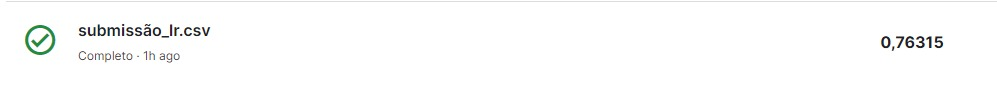